#Measurement of fitting time and query time

In this notebook different parameters and their influence to the fitting and query time of sklearn, lsh forest, minHash and annoy are examinded.

Computed on Intel i5-2415M 2.3 GHz, 16 GB RAM, Mac OS X 10.11 El Capitan

In [1]:
%matplotlib inline
import time
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LSHForest
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import neighborsMinHash as kneighbors
from neighborsMinHash.util import create_dataset
from neighborsMinHash.util import create_dataset_fixed_nonzero
from neighborsMinHash.util import measure_performance
from neighborsMinHash.util import plotData

import random

from scipy.sparse import dok_matrix
from scipy.sparse import rand
from scipy.sparse import vstack


import pyflann
import annoy

Measure the fitting time, query time and the accuracy of sklearn, lshf and minHash for the following parameters:
- seed = 6
- centroids = 8
- size_of_datasets = 7
- number_of_instances = [1000, 10000]
- number_of_features = [1000, 10000]
- density = 0.01
- fraction_of_density = 0.2
- n_neighbors_sklearn = 5
- n_neighbors_minHash = 5

In [2]:
seed = 6
centroids = 8
size_of_datasets = 7
number_of_instances = [1000, 10000]
number_of_features = [1000, 10000]
density = 0.01
fraction_of_density = 0.2
n_neighbors_sklearn = 5
n_neighbors_minHash = 5
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset, y = create_dataset(seed=seed, number_of_centroids=centroids, number_of_instances=instances,
                                         number_of_features=features,density = density,
                                         fraction_of_density=fraction_of_density, size_of_dataset = size_of_datasets)
        dataset_array.append(dataset)

returnValues = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash)

xticks = []
for i in number_of_instances:
    for j in number_of_features:
        tick = str(i)
        tick += "/"
        tick += str(j)
        xticks.append(tick)
# data, color, label, title, xticks, ylabel, number_of_instances, number_of_features,figure_size=(10,5),  bar_width=0.1,log=True
# plot query time for 50 times one query


TypeError: zip argument #2 must support iteration

In [ ]:
plotData(data=returnValues[:3], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Fitting times')

In [ ]:
len(number_of_instances)
len(number_of_features)

####Query time for x queries in one query

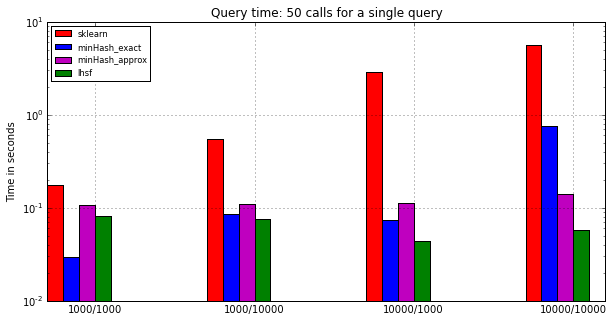

In [9]:
plotData(data=returnValues[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

####Query time for one time x queries

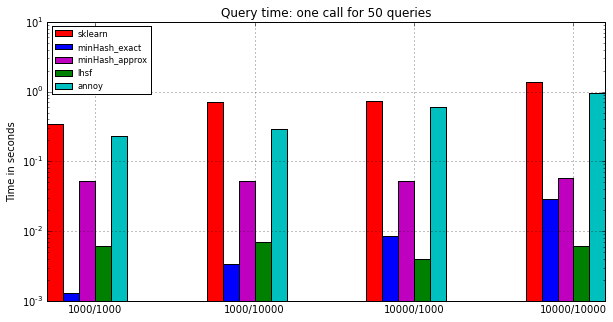

In [10]:
plotData(data=returnValues[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

####Accuracy for different datasets

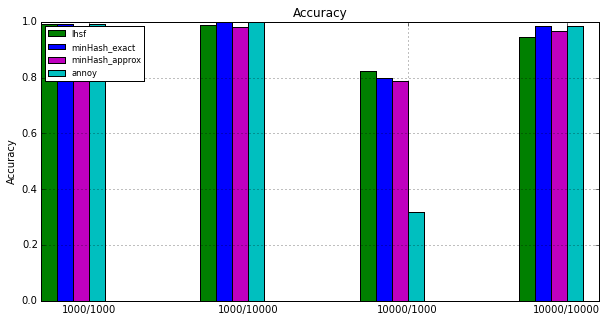

In [11]:
plotData(data=returnValues[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Accuracy', log=False)

## Non-zero elements are fixed

For the dataset the following parameters are used:
- seed=5
- number_of_centroids=7,
- number_of_instances=[100]
- number_of_features=[int(1e3)]
- size_of_dataset=8
- non_zero_elements=10
- fraction_of_density=0.2
                 

In [12]:
number_of_instances = [100]
number_of_features = [int(1e3), int(1e4), int(1e5)]
dataset_array = []
for instances in number_of_instances:
    for features in number_of_features:
        dataset_fixed, y = create_dataset_fixed_nonzero(seed=5,
                   number_of_centroids=7,
                   number_of_instances=instances,
                   number_of_features=features,
                   size_of_dataset=8,
                   non_zero_elements=10,
                   fraction_of_density=0.2)
        dataset_array.append(dataset_fixed)
returnValuesNonZero = measure_performance(dataset_array, n_neighbors_sklearn, n_neighbors_minHash)


Desity: 0.01
Desity: 0.001
Desity: 0.0001
Dataset processing:  1 / 3
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  2 / 3
Fitting of sklearn_nneighbors done!
Fitting of minHash_nneighbors done!
Fitting of LSHF done!
Fitting of annoy done!
Computation of sklearn_nneighbors done!
Computation of minHash_slow done!
Computation of minHash_fast done!
Computation of lshf done!
Computation_2 of sklearn_nneighbors done!
Computation_2 of minHash_slow done!
Computation_2 of minHash_fast done!
Computation_2 of lshf done!
Computation_2 of annoy done!
Dataset processing:  3 / 3
Fitting of sklearn_nneighbors don

In [ ]:
plotData(data=returnValues[:3], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Fitting times')

####Query time: 50 calls for a single query

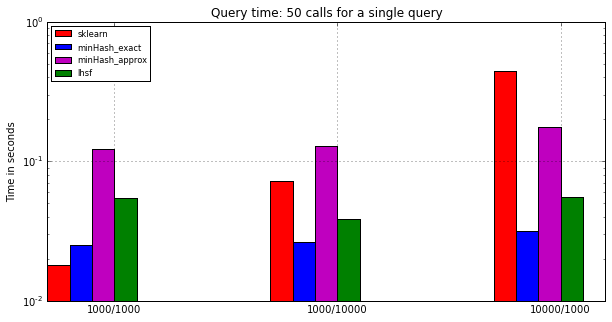

In [13]:
plotData(data=returnValuesNonZero[3:7], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: 50 calls for a single query')

####Query time: one call for 50 queries

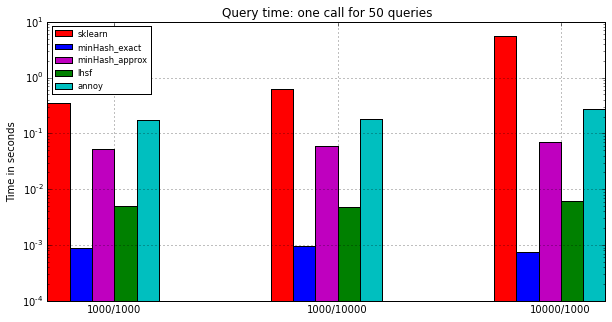

In [14]:
plotData(data=returnValuesNonZero[7:13], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=xticks, ylabel="Time in seconds", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Query time: one call for 50 queries')

####Accuracy for different datasets

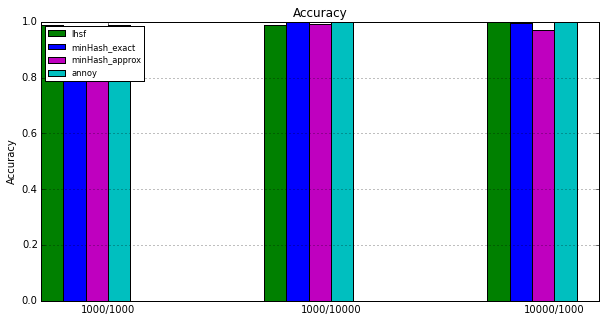

In [16]:
plotData(data=returnValuesNonZero[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=xticks, ylabel="Accuracy", number_of_instances=len(number_of_instances),
        number_of_features=len(number_of_features), title='Accuracy', log=False)